<h1> QRT Grand Data Challenge

<h2> 1. Dataset overview and imports

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold



print('Imports completed')

Imports completed


In [297]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [100]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              7735 non-null   int64  
 1   TS                  7735 non-null   object 
 2   ALLOCATION          7735 non-null   object 
 3   RET_20              7735 non-null   float64
 4   RET_19              7735 non-null   float64
 5   RET_18              7735 non-null   float64
 6   RET_17              7735 non-null   float64
 7   RET_16              7735 non-null   float64
 8   RET_15              7735 non-null   float64
 9   RET_14              7735 non-null   float64
 10  RET_13              7735 non-null   float64
 11  RET_12              7735 non-null   float64
 12  RET_11              7735 non-null   float64
 13  RET_10              7735 non-null   float64
 14  RET_9               7735 non-null   float64
 15  RET_8               7735 non-null   float64
 16  RET_7 

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180245 entries, 0 to 180244
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ROW_ID              180245 non-null  int64  
 1   TS                  180245 non-null  object 
 2   ALLOCATION          180245 non-null  object 
 3   RET_20              180245 non-null  float64
 4   RET_19              180245 non-null  float64
 5   RET_18              180245 non-null  float64
 6   RET_17              180245 non-null  float64
 7   RET_16              180245 non-null  float64
 8   RET_15              180245 non-null  float64
 9   RET_14              180245 non-null  float64
 10  RET_13              180245 non-null  float64
 11  RET_12              180245 non-null  float64
 12  RET_11              180245 non-null  float64
 13  RET_10              180245 non-null  float64
 14  RET_9               180245 non-null  float64
 15  RET_8               180245 non-nul

In [102]:
X_train.describe()

,ROW_ID,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,RET_12,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
count,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,...,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000
mean,90122.000000,0.000049,0.000047,0.000048,0.000044,0.000046,0.000047,0.000048,0.000051,0.000047,...,0.346875,0.346634,0.345756,0.345852,0.346303,0.346012,0.345476,0.347039,0.312530,0.090553
std,52032.393972,0.003219,0.003221,0.003218,0.003210,0.003224,0.003230,0.003230,0.003232,0.003236,...,1.459649,1.457869,1.456189,1.456412,1.451778,1.451993,1.453936,1.455624,1.258024,0.211366
min,0.000000,-0.034057,-0.033873,-0.033873,-0.033873,-0.033880,-0.033880,-0.033880,-0.033880,-0.033868,...,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-45.866750,0.000060
25%,45061.000000,-0.001297,-0.001297,-0.001299,-0.001302,-0.001301,-0.001301,-0.001299,-0.001296,-0.001300,...,-0.622953,-0.622107,-0.621620,-0.621587,-0.623241,-0.624514,-0.626985,-0.631204,-0.500096,0.004642
50%,90122.000000,0.000036,0.000035,0.000036,0.000034,0.000033,0.000034,0.000036,0.000036,0.000033,...,0.746502,0.745122,0.744565,0.745393,0.746206,0.747261,0.747909,0.752970,0.632397,0.019241
75%,135183.000000,0.001394,0.001391,0.001393,0.001390,0.001391,0.001396,0.001397,0.001398,0.001395,...,1.106023,1.105206,1.103555,1.103333,1.104396,1.104378,1.104410,1.106166,0.975190,0.058259
max,180244.000000,0.038305,0.038305,0.038199,0.038199,0.038199,0.038199,0.038199,0.038199,0.038199,...,74.096560,74.096560,74.096560,74.096560,45.691677,45.691677,45.463356,45.463356,46.314335,1.580719


In [103]:
X_train.describe(include='O')

,TS,ALLOCATION
count,180245,180245
unique,2773,65
top,DATE_0001,ALLOCATION_01
freq,65,2773


In [104]:
X_train.head()

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,0,DATE_0001,ALLOCATION_01,-0.002477,0.004826,0.005374,-0.001688,-0.000152,-0.000685,-0.002217,...,-1.016154,-1.011450,-1.171714,-0.729594,-1.208138,-1.215123,-0.848346,-0.642461,-0.203447,0.054324
1,1,DATE_0001,ALLOCATION_02,0.006863,-0.005265,-0.004249,0.002686,-0.002638,0.003056,0.002712,...,0.896098,1.429419,0.946527,1.059767,0.988289,0.956915,0.943508,0.124168,0.081083,0.015669
2,2,DATE_0001,ALLOCATION_03,-0.005535,0.008541,0.005360,-0.002491,0.004679,-0.000848,-0.007197,...,-0.889142,-0.939257,-0.980370,-0.863196,-0.839662,-0.882459,-1.172723,-0.863937,-0.695998,0.057961
3,3,DATE_0001,ALLOCATION_04,0.003178,-0.001352,-0.004051,-0.001841,-0.005659,0.000627,0.006686,...,-1.788263,-0.807971,-1.587942,-0.042083,-1.356051,-1.007006,-1.821786,-0.455660,-1.090989,0.096004
4,4,DATE_0001,ALLOCATION_05,0.003359,-0.003349,-0.005460,0.000416,-0.003533,0.000913,0.005088,...,0.326148,1.013100,0.362135,0.774670,0.370484,-0.132558,-0.417645,-1.284208,-1.382900,0.005816


In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              7735 non-null   int64  
 1   TS                  7735 non-null   object 
 2   ALLOCATION          7735 non-null   object 
 3   RET_20              7735 non-null   float64
 4   RET_19              7735 non-null   float64
 5   RET_18              7735 non-null   float64
 6   RET_17              7735 non-null   float64
 7   RET_16              7735 non-null   float64
 8   RET_15              7735 non-null   float64
 9   RET_14              7735 non-null   float64
 10  RET_13              7735 non-null   float64
 11  RET_12              7735 non-null   float64
 12  RET_11              7735 non-null   float64
 13  RET_10              7735 non-null   float64
 14  RET_9               7735 non-null   float64
 15  RET_8               7735 non-null   float64
 16  RET_7 

In [106]:
X_test.describe()

,ROW_ID,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,RET_12,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,...,7735.000000,7735.000000,7735.000000,7676.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,184112.000000,-0.000031,-0.000075,-0.000023,0.000016,0.000115,0.000119,0.000010,0.000065,-0.000054,...,0.391035,0.400705,0.372728,0.391833,0.368366,0.416738,0.382572,0.422824,0.291271,0.086437
std,2233.046499,0.003970,0.003473,0.002951,0.003063,0.003038,0.003591,0.003187,0.003710,0.003298,...,1.309588,1.466399,1.299512,1.321934,1.350420,1.298961,1.323287,1.299067,1.014690,0.217977
min,180245.000000,-0.069293,-0.029015,-0.029395,-0.029063,-0.021838,-0.033068,-0.025319,-0.029438,-0.023345,...,-11.636165,-48.806396,-12.053021,-10.466323,-19.391768,-10.787054,-16.648079,-9.743671,-7.725879,0.000154
25%,182178.500000,-0.001621,-0.001674,-0.001545,-0.001514,-0.001386,-0.001472,-0.001562,-0.001540,-0.001597,...,-0.539940,-0.575735,-0.536445,-0.572215,-0.616311,-0.588531,-0.578938,-0.542556,-0.385317,0.004717
50%,184112.000000,-0.000035,-0.000007,-0.000013,0.000014,0.000092,0.000003,-0.000017,0.000003,-0.000033,...,0.793514,0.813243,0.786609,0.810943,0.809134,0.839687,0.806879,0.805861,0.568110,0.016478
75%,186045.500000,0.001549,0.001553,0.001511,0.001493,0.001639,0.001540,0.001530,0.001547,0.001478,...,1.118323,1.115314,1.101853,1.143613,1.096189,1.144513,1.127580,1.115669,0.879886,0.044575
max,187979.000000,0.047968,0.025006,0.020434,0.023931,0.019229,0.037660,0.027331,0.032316,0.024474,...,10.227108,23.734669,8.011360,8.795315,10.373502,19.734356,9.067154,10.373459,6.319981,1.527174


In [107]:
X_test.describe(include='O')

,TS,ALLOCATION
count,7735,7735
unique,119,65
top,DATE_2774,ALLOCATION_01
freq,65,119


In [108]:
X_test.head(70)

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,180245,DATE_2774,ALLOCATION_01,-0.006869,-0.001703,-0.003348,-0.003129,-0.003368,-0.002515,-0.001182,...,1.467264,1.114890,1.227472,0.835403,1.571033,0.946056,1.691493,3.561658,0.038297,0.010310
1,180246,DATE_2774,ALLOCATION_02,-0.002409,-0.000763,0.001349,-0.002069,-0.000147,0.002263,-0.004348,...,0.212862,0.571286,0.711297,0.815702,-0.102490,0.969315,1.738142,5.400385,2.127508,0.013252
2,180247,DATE_2774,ALLOCATION_03,-0.004936,-0.001041,-0.004108,-0.002354,-0.003627,0.000263,0.001072,...,1.165160,1.004918,1.159257,1.110129,1.473592,1.013560,1.622486,2.346189,0.676293,0.013975
3,180248,DATE_2774,ALLOCATION_04,-0.008992,-0.000644,0.001352,-0.004524,-0.004002,-0.004404,0.000524,...,1.557001,1.156245,1.688199,0.553323,2.060668,0.746113,2.300634,5.564923,-0.637974,0.017026
4,180249,DATE_2774,ALLOCATION_05,-0.002797,-0.001686,0.002453,-0.000645,0.000615,-0.000624,-0.004374,...,0.135133,0.115105,0.344619,0.312612,0.932051,0.335749,1.021416,2.351529,0.030891,0.006701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,180310,DATE_2775,ALLOCATION_01,0.001492,0.003836,-0.002736,0.000867,0.001361,-0.003420,0.000498,...,1.620890,1.752802,1.987774,3.717221,1.969099,1.786482,2.277948,2.236189,1.574036,0.039296
66,180311,DATE_2775,ALLOCATION_02,-0.001004,0.000786,0.001672,-0.004822,0.000780,0.005752,-0.000114,...,2.123775,2.491327,3.982524,1.628860,1.141928,1.302914,1.949023,0.831566,1.466624,0.015080
67,180312,DATE_2775,ALLOCATION_03,0.001220,0.005028,-0.000982,0.002371,0.000495,-0.003739,-0.000054,...,1.055995,1.256934,1.335385,2.569958,1.367763,1.244728,1.655826,1.747727,1.318365,0.041072
68,180313,DATE_2775,ALLOCATION_04,0.000963,0.003119,-0.003957,-0.000383,0.001816,0.000248,0.002078,...,2.086635,1.718470,1.658662,3.006546,2.007813,1.781856,1.714665,1.876948,1.313433,0.059018


<h2> EDA + Visualization

In [109]:
ret_cols = [f'RET_{i}' for i in range(1,21)]
vol_cols = [f'SIGNED_VOLUME_{i}' for i in range(1,21)]

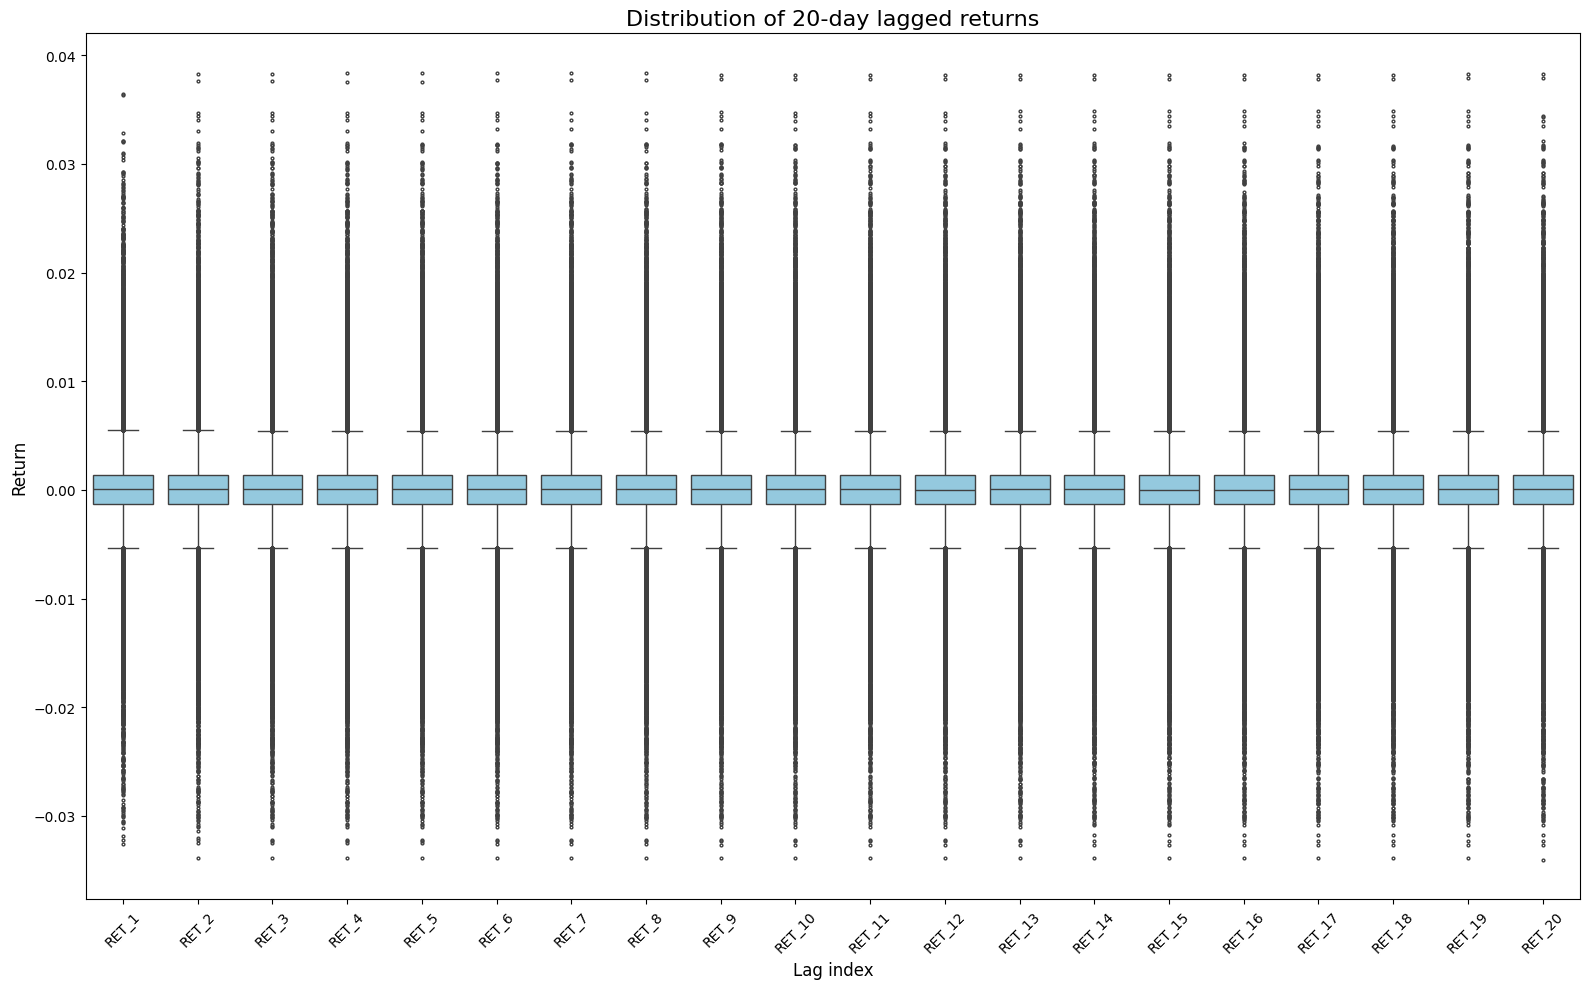

In [13]:
plt.figure(figsize=(16, 10))  # 👈 increase width and height here
sns.boxplot(data=X_train[ret_cols], color='skyblue', fliersize=2)
plt.title("Distribution of 20-day lagged returns", fontsize=16)
plt.xlabel("Lag index", fontsize=12)
plt.ylabel("Return", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Observations :
- The median seems always close to O
- A big number of outliers indicates a certain noise in the dataset

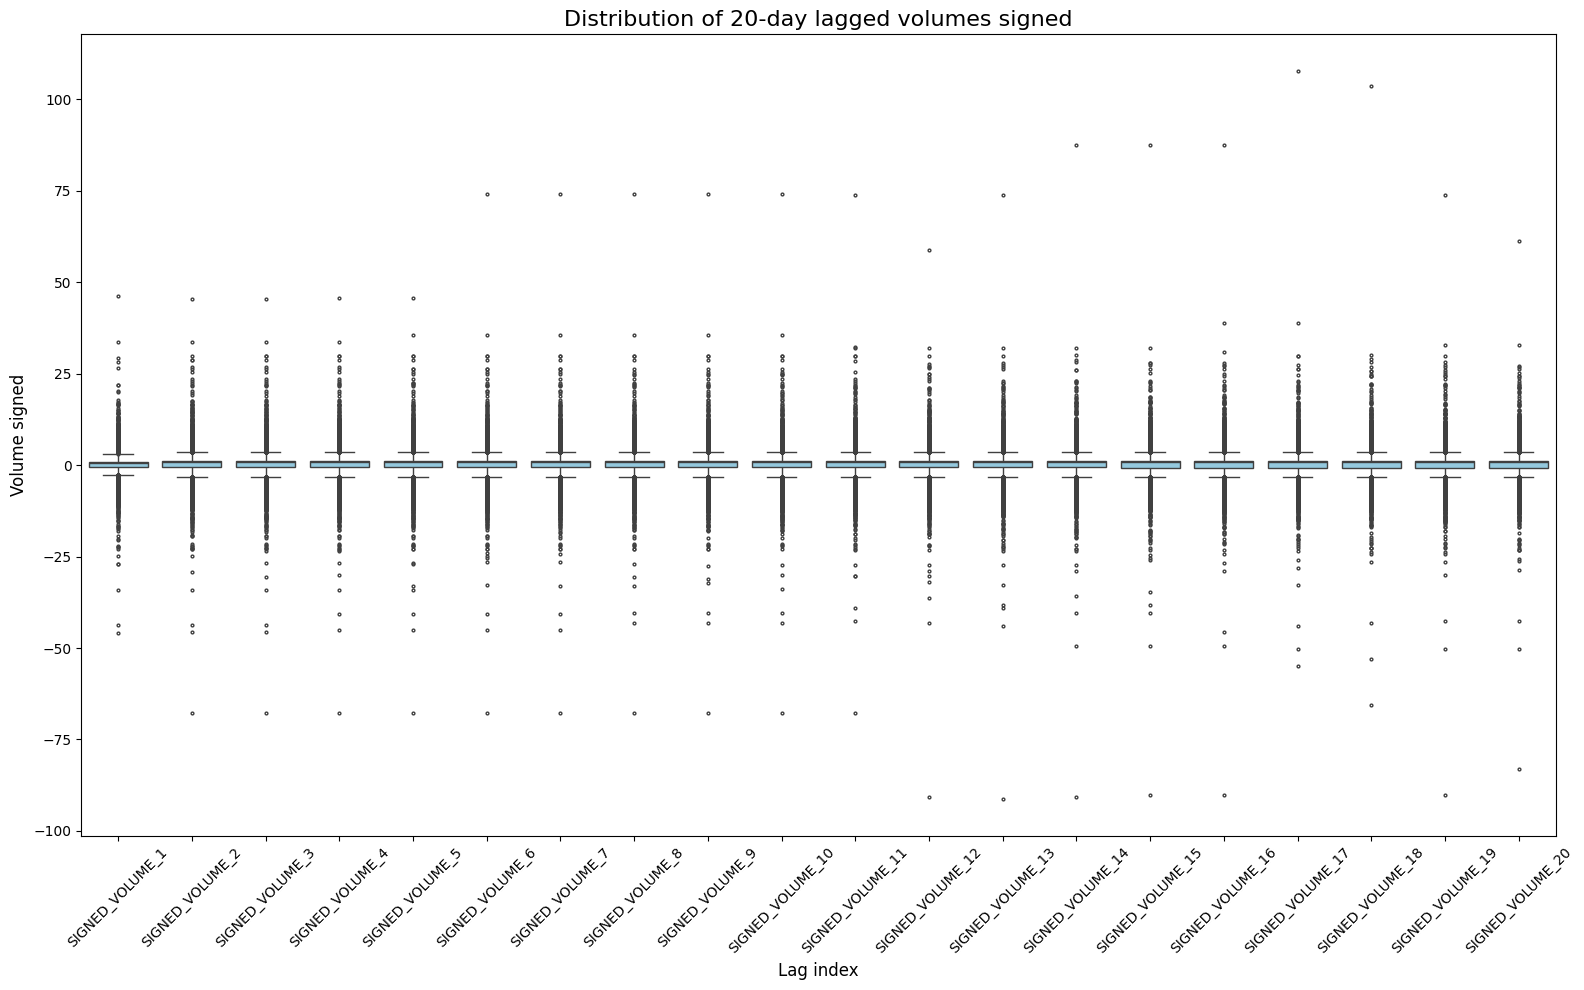

In [14]:
plt.figure(figsize=(16, 10))  # 👈 increase width and height here
sns.boxplot(data=X_train[vol_cols], color='skyblue', fliersize=2)
plt.title("Distribution of 20-day lagged volumes signed", fontsize=16)
plt.xlabel("Lag index", fontsize=12)
plt.ylabel("Volume signed", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Still quite a few outliers !

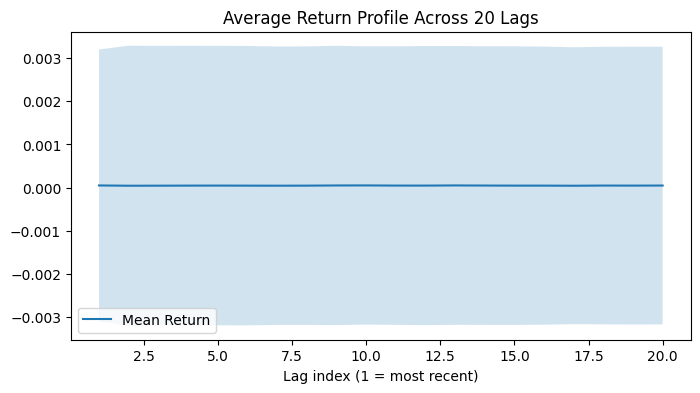

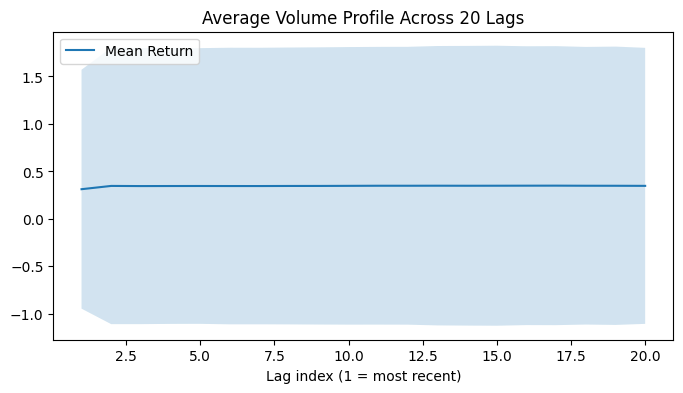

In [15]:
mean_returns = X_train[ret_cols].mean()
mean_volumes = X_train[vol_cols].mean()
std_returns = X_train[ret_cols].std()
std_volumes = X_train[vol_cols].std()



plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), mean_returns, label="Mean Return")
plt.fill_between(range(1, 21),
                 mean_returns - std_returns,
                 mean_returns + std_returns,
                 alpha=0.2)
plt.title("Average Return Profile Across 20 Lags")
plt.xlabel("Lag index (1 = most recent)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), mean_volumes, label="Mean Return")
plt.fill_between(range(1, 21),
                 mean_volumes- std_volumes,
                 mean_volumes + std_volumes,
                 alpha=0.2)
plt.title("Average Volume Profile Across 20 Lags")
plt.xlabel("Lag index (1 = most recent)")
plt.legend()
plt.show()


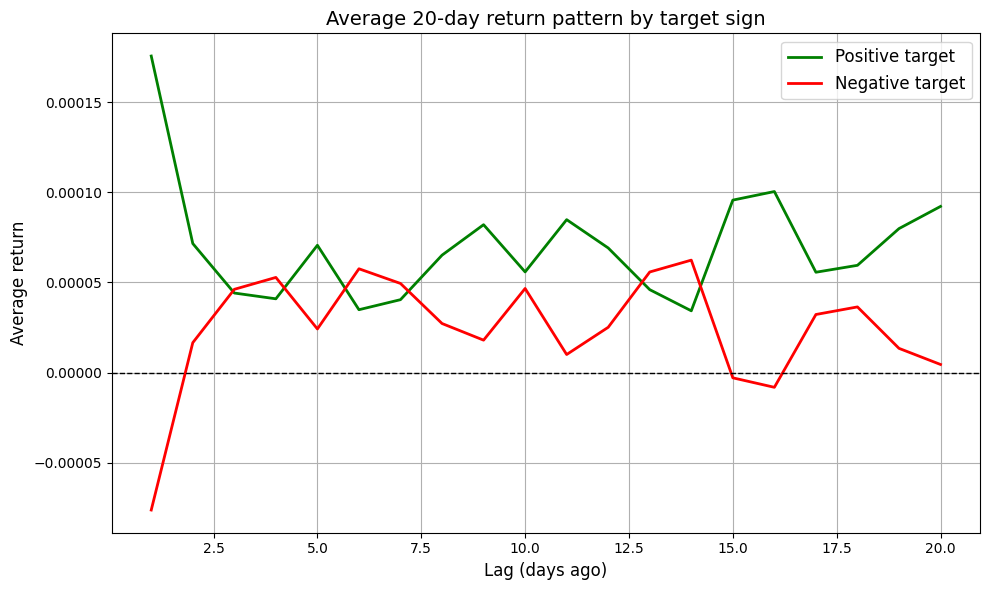

In [16]:
pos_index = (y_train[(y_train.target >0)]).index
neg_index = (y_train[(y_train.target <=0)]).index
pos = X_train.iloc[pos_index,:][ret_cols]
neg = X_train.iloc[neg_index,:][ret_cols]

mean_pos = pos.mean()
mean_neg = neg.mean()

# Plot both on same figure
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mean_pos, label="Positive target", color="green", linewidth=2)
plt.plot(range(1, 21), mean_neg, label="Negative target", color="red", linewidth=2)

# Optional: add a horizontal line at 0
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Titles and legend
plt.title("Average 20-day return pattern by target sign", fontsize=14)
plt.xlabel("Lag (days ago)", fontsize=12)
plt.ylabel("Average return", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
y_train = y_train.drop(columns=['ROW_ID'])

In [32]:
pd.DataFrame((y_train.target>0).astype(int))

,target
0,1
1,0
2,1
3,0
4,0
...,...
180240,0
180241,1
180242,0
180243,1


<h1>Feature engineering

In [331]:
def feature_engineering(X):
    
    RET_features = [f'RET_{i}' for i in range(1, 20)]
    SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1, 20)]
    TURNOVER_features = ['AVG_DAILY_TURNOVER']

    for i in range(2,21):
        X[f'AVERAGE_PERF_{i}'] = X[RET_features[:i]].mean(1)
        X[f'ALLOCATIONS_AVERAGE_PERF_{i}'] = X.groupby('TS')[f'AVERAGE_PERF_{i}'].transform('mean')
        X[f'AVERAGE_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].mean(1)
        X[f'STD_PERF_{i}'] = X[RET_features[:i]].std(axis=1)
        X[f'STD_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].std(axis=1)



    X["RET_VOLATILITY_20"] = X[RET_features].std(axis=1)
    X["RET_MOMENTUM"] = X["RET_1"] - X[RET_features].mean(axis=1)
    X["RET_SHARPE"] = X["RET_MOMENTUM"] / (X["RET_VOLATILITY_20"] + 1e-6)
    X["SIGNED_VOLUME_VOL"] = X[SIGNED_VOLUME_features].std(axis=1)
    X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)
    X["RET_TREND_5"] = X["RET_20"] - X["RET_15"]
    X["VOL_TREND_5"] = X["SIGNED_VOLUME_20"] - X["SIGNED_VOLUME_15"]
    X["RET_LAG1"] = X["RET_1"]
    X["RET_DIFF1"] = X["RET_1"] - X["RET_2"]

    X["RET_SKEW_20"] = X[RET_features].skew(axis=1)
    X["RET_KURT_20"] = X[RET_features].kurt(axis=1)
    X["VOL_PERF_RATIO"] = X[SIGNED_VOLUME_features].mean(axis=1) / (X[RET_features].std(axis=1) + 1e-6)

    weights = np.linspace(1, 2, 19)
    X["RET_WEIGHTED_MOMENTUM"] = (X[RET_features].values * weights).sum(axis=1) / weights.sum()

    X["n_pos_20"] = (X[ret_cols] > 0).sum(axis=1) #number of positive days
    
    def longest_streak_pos(row):
    # function for apply over axis=1; OK pour ~180k x 20 (coût acceptable)
        max_run = 0
        cur = 0
        for v in row:
            if v > 0:
                cur += 1
                if cur > max_run:
                    max_run = cur
            else:
                cur = 0
        return max_run
    X["longest_pos_streak"] = X[ret_cols].apply(lambda r: longest_streak_pos(r.values), axis=1)

    #cumulative return sum
    X["cumret_20_sum"] = X[ret_cols].sum(axis=1)

    r = X[ret_cols].values
    v = X[vol_cols].values
    # rowwise corr: cov/(std*std)
    r_mean = r.mean(axis=1, keepdims=True)
    v_mean = v.mean(axis=1, keepdims=True)
    cov = ((r - r_mean) * (v - v_mean)).mean(axis=1)
    r_std = r.std(axis=1)
    v_std = v.std(axis=1)
    corr = cov / (r_std * v_std + 1e-9)
    X["ret_vol_corr_20"] = corr

    X["mean1_5_times_turnover"] = X['ALLOCATIONS_AVERAGE_PERF_5'] * X["AVG_DAILY_TURNOVER"]
    X["ts_mean_ret"] = X.groupby("TS")["AVERAGE_PERF_20"].transform("mean")
    X["relative_perf_vs_ts"] = X["AVERAGE_PERF_20"] - X["ts_mean_ret"]
    


    return X, RET_features, SIGNED_VOLUME_features, TURNOVER_features

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:20: SyntaxWarning: invalid escape sequence '\d'
  X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)


In [332]:
X_train, RET_features, SIGNED_VOLUME_features, TURNOVER_features = feature_engineering(X_train)

features = (
    RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features
    + [f'AVERAGE_PERF_{i}' for i in range(2,21)]
    + [f'AVERAGE_VOL_{i}' for i in range(2,21)]
    + [f'ALLOCATIONS_AVERAGE_PERF_{i}' for i in range(2,21)]
    + [f'STD_PERF_{i}' for i in range(2,21)]
    + [f'STD_VOL_{i}' for i in range(2,21)]
    + ["RET_VOLATILITY_20", "RET_MOMENTUM", "RET_SHARPE", "SIGNED_VOLUME_VOL","VOL_TREND_5","RET_TREND_5"]
    + ["ALLOCATION_enc"]
    +["TS_num"]
    +["VOL_PERF_RATIO","RET_KURT_20","RET_SKEW_20","RET_DIFF1","RET_LAG1"]
    +["ret_vol_corr_20"]
    +["mean1_5_times_turnover"]
    +["cumret_20_sum"]
    +["n_pos_20"]
    +["longest_pos_streak"]
    +["RET_WEIGHTED_MOMENTUM"]
    +["ts_mean_ret"]
    +["relative_perf_vs_ts"]
)

X_train.columns

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X["ts_mean_ret"] = X.groupby("TS")["AVERAGE_PERF_20"].transform("mean")
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X["relative_perf_vs_ts"] = X["AVERAGE_PERF_20"] - X["ts_mean_ret"]


Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14',
       ...
       'VOL_PERF_RATIO', 'RET_WEIGHTED_MOMENTUM', 'n_pos_20',
       'longest_pos_streak', 'cumret_20_sum', 'ret_vol_corr_20',
       'mean1_5_times_turnover', 'ALLOCATION_enc', 'ts_mean_ret',
       'relative_perf_vs_ts'],
      dtype='object', length=160)

In [333]:

def oof_target_encoding(X, y, col, n_splits=5, random_state=42, smoothing=0.3):
    # Copier et réaligner les index
    X = X.copy().reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Créer la colonne vide
    X[f"{col}_enc"] = np.nan
    
    # KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # OOF encoding
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train = y.iloc[train_idx]
        
        # Fit le target encoder sur les folds d'entraînement
        encoder = TargetEncoder(smoothing=smoothing)
        encoder.fit(X_train[[col]], (y_train > 0).astype(int))
        
        # Transform sur le fold de validation
        X.loc[val_idx, f"{col}_enc"] = encoder.transform(X_val[[col]]).values.flatten()
    
    # Vérification (s’il reste des NaN, on remplit avec la moyenne globale du target)
    if X[f"{col}_enc"].isna().any():
        global_mean = (y > 0).mean()
        X[f"{col}_enc"].fillna(global_mean, inplace=True)
    
    # Fit final sur tout le train (pour le test)
    encoder.fit(X[[col]], (y > 0).astype(int))
    
    display(X.ALLOCATION_enc)
    return X, encoder

X_train, encoder_alloc = oof_target_encoding(
    X_train, 
    y_train["target"], 
    col="ALLOCATION"
)



0         0.535199
1         0.484297
2         0.519751
3         0.478319
4         0.481749
            ...   
180240    0.546322
180241    0.451423
180242    0.557065
180243    0.499322
180244    0.465587
Name: ALLOCATION_enc, Length: 180245, dtype: float64

In [305]:
X_train.isna().sum()

ROW_ID                    0
TS                        0
ALLOCATION                0
RET_20                    0
RET_19                    0
                         ..
longest_pos_streak        0
cumret_20_sum             0
ret_vol_corr_20           0
mean1_5_times_turnover    0
ALLOCATION_enc            0
Length: 158, dtype: int64

In [306]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features])

It seems that the mean last day return is quite correlated with the sign of the return of the next day. It could be very useful to create a feature representing the mean, and if that mean if higher than 0.00005 ?

Text(0.5, 1.0, 'Feature Correlation Heatmap')

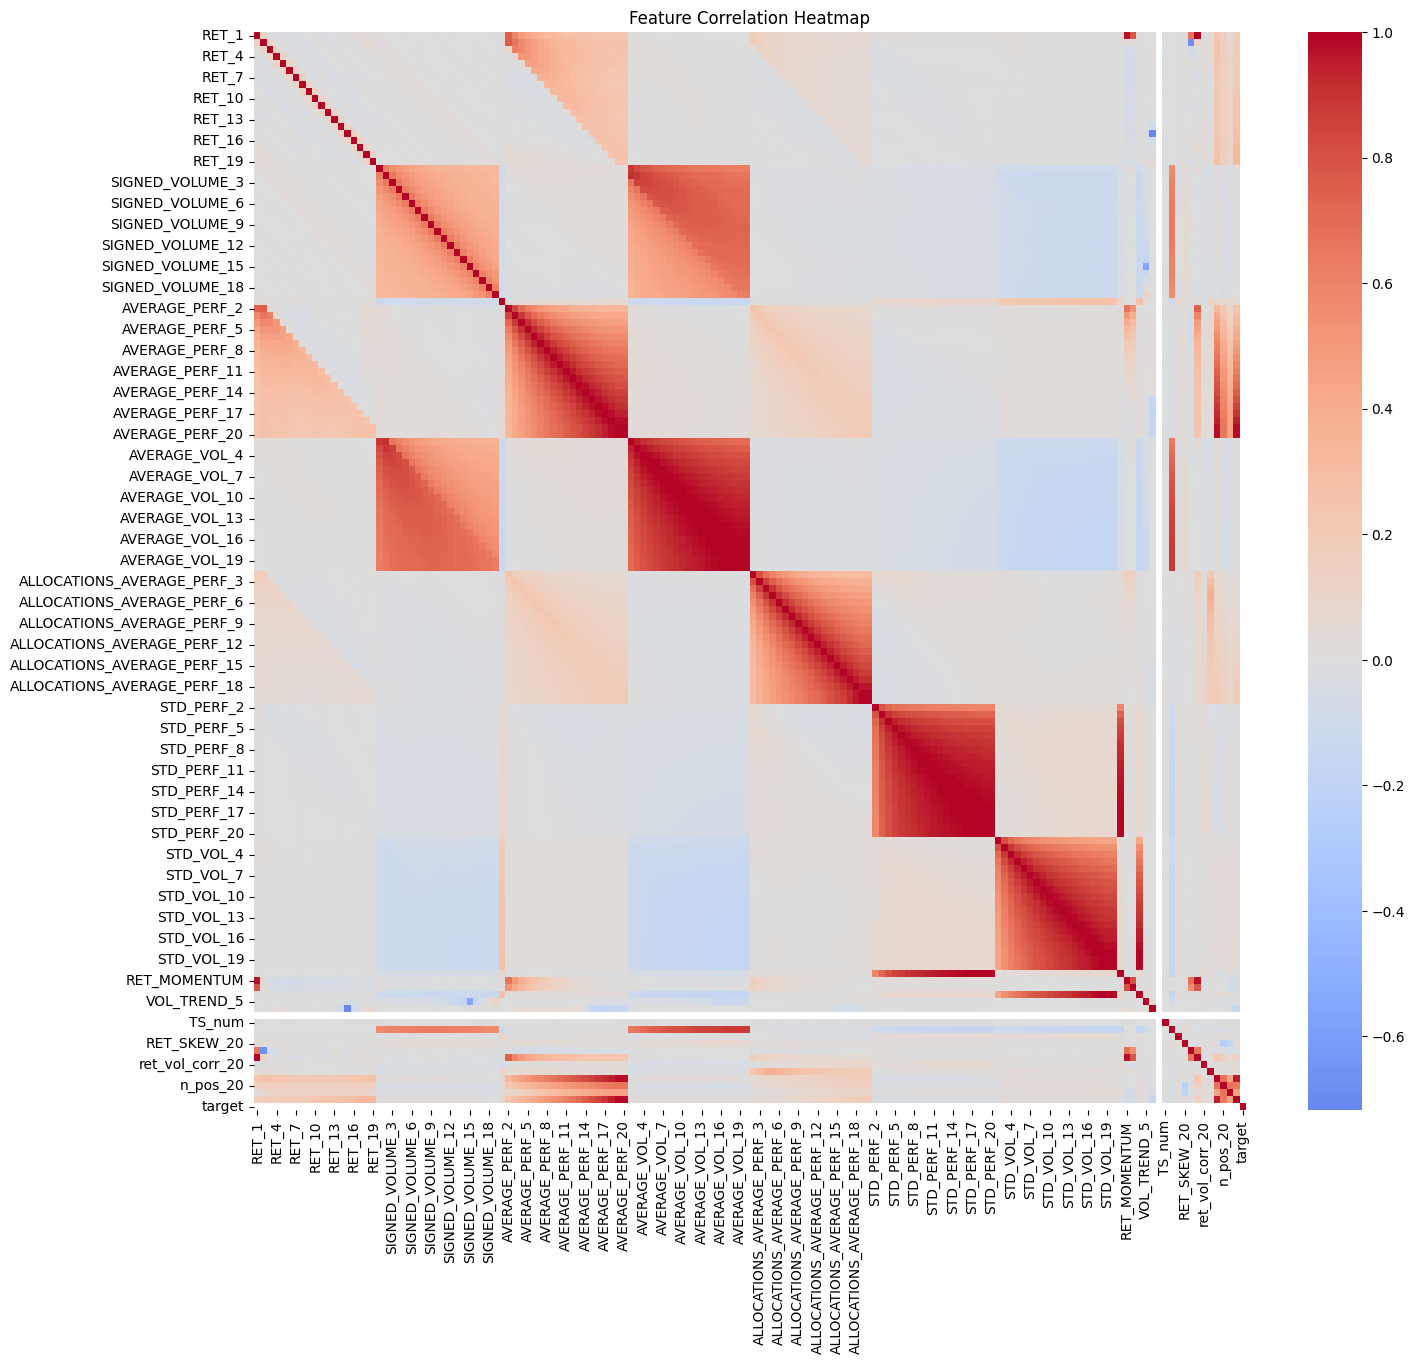

In [283]:
plt.figure(figsize=(16,14))
corr = pd.concat([X_train[features], y_train.target]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")

Observation :
- The return of two consecutive days are a bit correlated, that makes sense with the graph plotting the positive/negative target std_returns
- The volumes are very correlated, we can think about the PCA or dropping some columns to avoid too highly correlated features

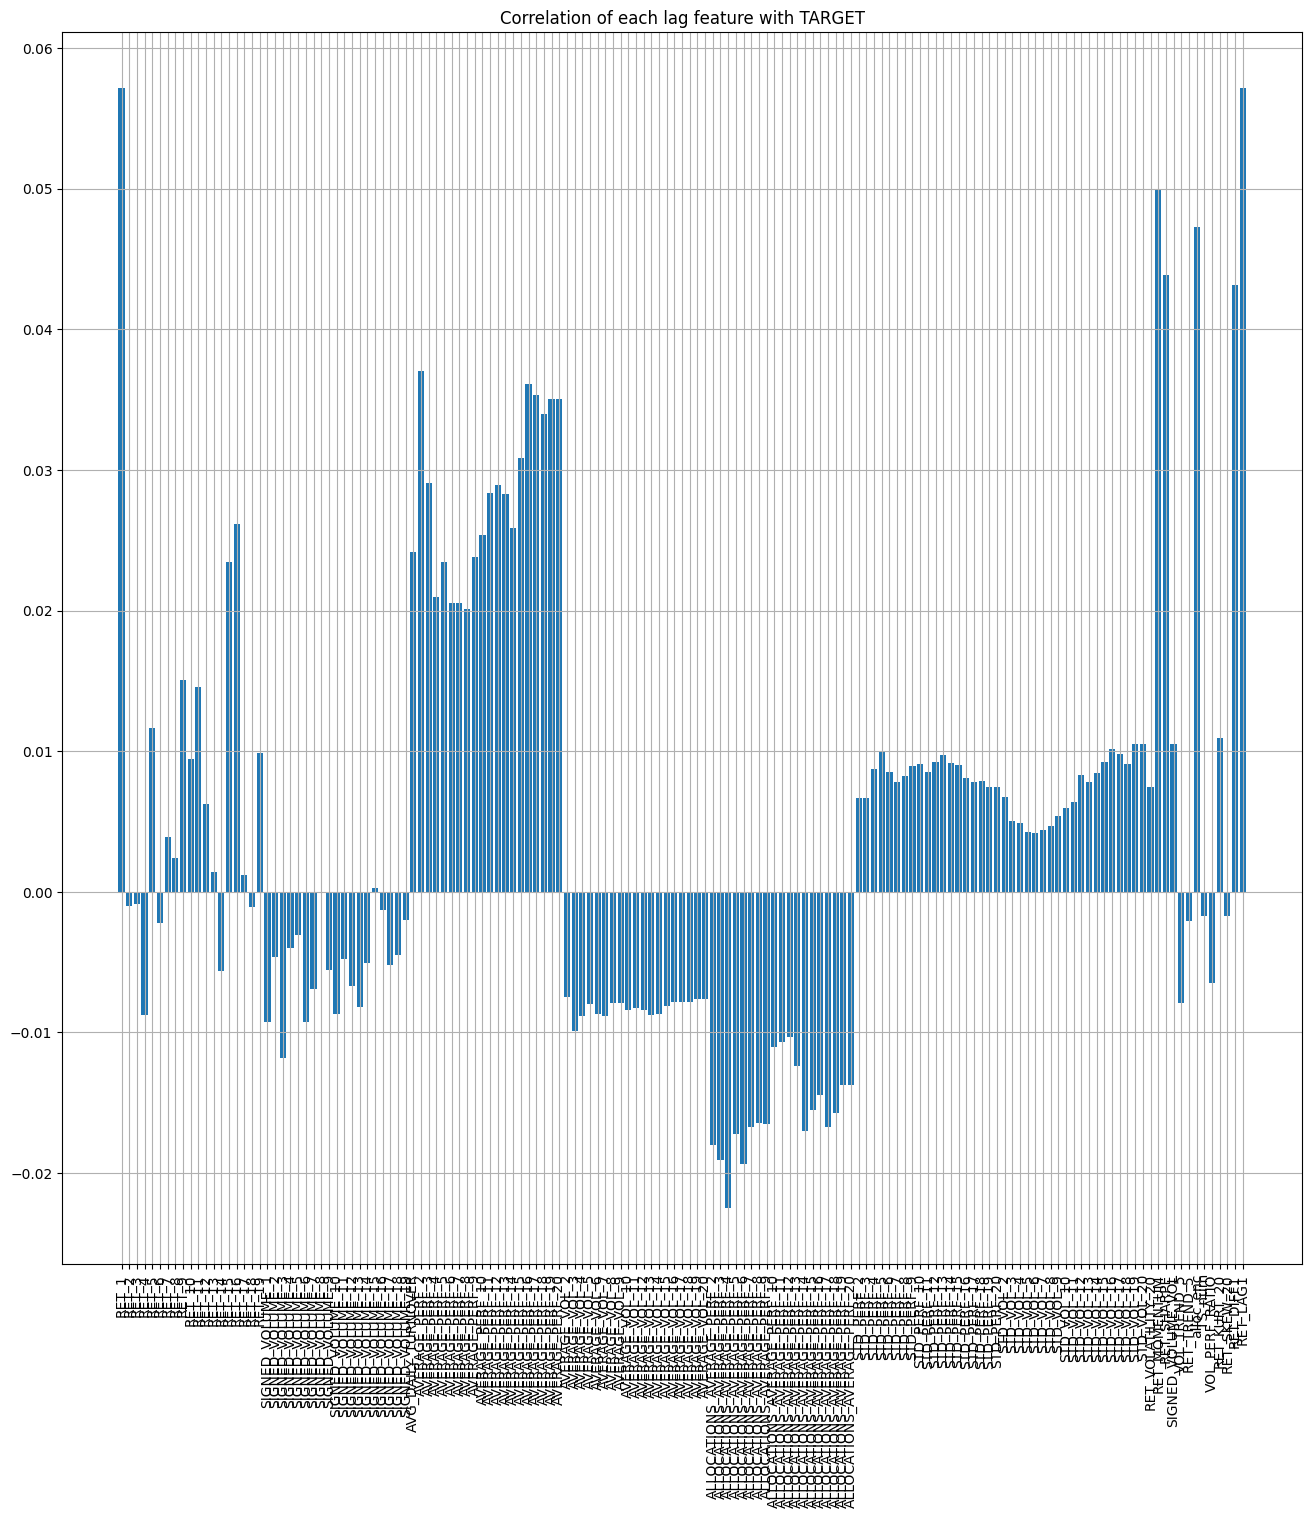

In [120]:
plt.figure(figsize=(16,16))
corrs = [np.corrcoef(X_train[col], y_train.target.T)[0, 1] for col in features]
plt.bar(range(len(corrs)), corrs)
plt.xticks(range(len(corrs)), features, rotation=90)
plt.title("Correlation of each lag feature with TARGET")
plt.grid()

Preprocessing + PCA + Isolation Forest

In [309]:
import numpy as np
from sklearn.decomposition import PCA

# Ajuste ton seuil ici (ex. 0.95 = 95 % de variance expliquée)
variance_threshold = 0.9

# Fit PCA sur toutes les dimensions possibles
pca_full = PCA(random_state=42)
pca_full.fit(X_train_scaled)

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Trouver le plus petit k tel que variance cumulée >= seuil
optimal_k = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"Nombre optimal de composantes PCA : {optimal_k}")
print(f"Variance expliquée cumulée : {cumulative_variance[optimal_k-1]:.4f}")

# Recalcule le PCA final avec ce nombre de composantes
pca_optimal = PCA(n_components=optimal_k, random_state=42)
X_pca_optimal = pca_optimal.fit_transform(X_train_scaled)

print("Forme du jeu de données après PCA :", X_pca_optimal.shape)


Nombre optimal de composantes PCA : 34
Variance expliquée cumulée : 0.9014
Forme du jeu de données après PCA : (180245, 34)


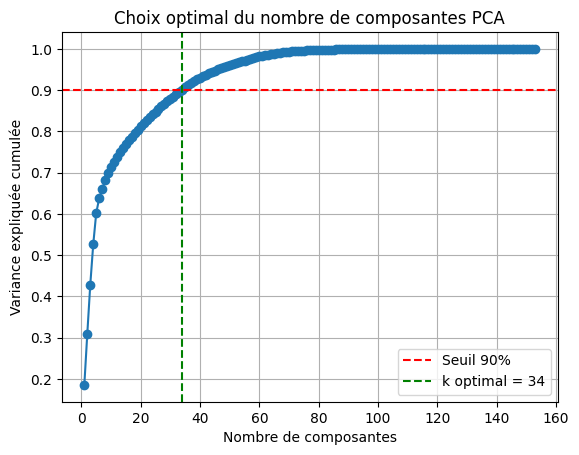

In [310]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(variance_threshold, color='r', linestyle='--', label=f'Seuil {variance_threshold*100:.0f}%')
plt.axvline(optimal_k, color='g', linestyle='--', label=f'k optimal = {optimal_k}')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix optimal du nombre de composantes PCA")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# --- Paramètres ---
pca_components = [i for i in range(3,61,2)]         # ajout de 35 et 45
iso_contaminations = [i/100 for i in range(1,15)]      # ajout de 12%

# --- Étape 1 : Créer et ajuster les PCA ---
pca_models = {f"pca{k}": PCA(n_components=k, random_state=42) for k in pca_components}
X_pca = {f"X_pca{k}": model.fit_transform(X_train_scaled) for k, model in pca_models.items()}

# --- Étape 2 : Créer les IsolationForest ---
iso_models = {f"iso{int(c*100)}": IsolationForest(contamination=c, random_state=42) for c in iso_contaminations}

# --- Étape 3 : Entraîner les IsolationForest sur chaque PCA ---
labels = {}
for k, Xpca in X_pca.items():          # k = "X_pca5", "X_pca15", ...
    for c_str, iso in iso_models.items():  # c_str = "iso4", "iso8", "iso12"
        c_val = iso.contamination          # on récupère la vraie valeur 0.04, 0.08 ou 0.12
        label_name = f"label_{k[6:]}_{int(c_val*100)}"  # ex: label_5_4, label_15_8
        labels[label_name] = iso.fit_predict(Xpca)
        print(f"{label_name} créé → {sum(labels[label_name]==-1)} anomalies détectées")


label_ca3_1 créé → 1803 anomalies détectées
label_ca3_2 créé → 3605 anomalies détectées
label_ca3_3 créé → 5408 anomalies détectées
label_ca3_4 créé → 7210 anomalies détectées
label_ca3_5 créé → 9013 anomalies détectées
label_ca3_6 créé → 10815 anomalies détectées
label_ca3_7 créé → 12618 anomalies détectées
label_ca3_8 créé → 14420 anomalies détectées
label_ca3_9 créé → 16222 anomalies détectées
label_ca3_10 créé → 18025 anomalies détectées
label_ca3_11 créé → 19827 anomalies détectées
label_ca3_12 créé → 21630 anomalies détectées
label_ca3_13 créé → 23432 anomalies détectées
label_ca3_14 créé → 25235 anomalies détectées
label_ca6_1 créé → 1803 anomalies détectées
label_ca6_2 créé → 3605 anomalies détectées
label_ca6_3 créé → 5408 anomalies détectées
label_ca6_4 créé → 7210 anomalies détectées
label_ca6_5 créé → 9013 anomalies détectées
label_ca6_6 créé → 10815 anomalies détectées
label_ca6_7 créé → 12618 anomalies détectées
label_ca6_8 créé → 14420 anomalies détectées
label_ca6_9 cré

In [255]:
labels

array([1, 1, 1, ..., 1, 1, 1], shape=(180245,))

AVEC LASSO

In [313]:
from sklearn.linear_model import LogisticRegression
ridge_params = dict(alpha=1e-2, fit_intercept=False)
n_splits = 5
random_state = 42
results = []

# --- Créons un mapping explicite label → PCA ---
label_to_pca = {}
for label_name in labels.keys():
    # Cherchons dans X_pca celle dont le n_components est contenu dans le nom du label
    for pca_key in X_pca.keys():
        if pca_key[6:] in label_name:  # ex: "5" dans "label_5_4"
            label_to_pca[label_name] = pca_key
            break
    else:
        raise KeyError(f"Impossible de trouver PCA correspondante pour {label_name}")

# --- Boucle sur chaque label ---
for label_name, lbl_array in labels.items():
    #print(f"\n=== Test avec {label_name} ===")

    pca_key = label_to_pca[label_name]
    X_train_pca = X_pca[pca_key]

    # Filtrage des inliers
    mask = lbl_array == 1
    X_train_clean = X_train_pca[mask]
    y_train_clean = y_train[mask].squeeze()   # Assure-toi que y_train est aligné avec X_scaled
    y_train_clean = (y_train_clean > 0).astype(int).squeeze()
    y_train_clean = y_train_clean.drop(columns=['ROW_ID'])



    #print(f"Train shape after PCA+ISO ({label_name}): {X_train_clean.shape}")
    #print(f"Outliers retirés: {(lbl_array == -1).sum()}")

    # K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(len(y_train_clean))
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_clean, y_train_clean)):
        X_tr, X_val = X_train_clean[train_idx], X_train_clean[val_idx]
        y_tr, y_val = y_train_clean.iloc[train_idx], y_train_clean.iloc[val_idx]

        model = RidgeClassifier(alpha=1e-2, fit_intercept=False)
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        oof_preds[val_idx] = y_val_pred
        

        acc = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_pred)
        fold_scores.append(dict(fold=fold+1, acc=acc, f1=f1, auc=auc))

        #print(f"Fold {fold+1} → ACC={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")

    # Scores globaux OOF
    acc_oof = accuracy_score(y_train_clean, oof_preds)
    f1_oof = f1_score(y_train_clean, oof_preds)
    auc_oof = roc_auc_score(y_train_clean, oof_preds)
    #print(f"OOF ({label_name}) → ACC={acc_oof:.4f}, F1={f1_oof:.4f}, AUC={auc_oof:.4f}")

    results.append({
        "label": label_name,
        "pca_key": pca_key,
        "oof_acc": acc_oof,
        "oof_f1": f1_oof,
        "oof_auc": auc_oof,
        "fold_details": fold_scores
    })

# Comparaison globale
res_df = pd.DataFrame([
    {"Label": r["label"], "PCA": r["pca_key"], "OOF_ACC": r["oof_acc"], "OOF_F1": r["oof_f1"], "OOF_AUC": r["oof_auc"]}
    for r in results
])

display(res_df.sort_values("OOF_AUC", ascending=False))


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

,Label,PCA,OOF_ACC,OOF_F1,OOF_AUC
224,label_ca51_1,X_pcapca51,0.527606,0.511274,0.527798
238,label_ca54_1,X_pcapca54,0.527622,0.513022,0.527791
211,label_ca48_2,X_pcapca48,0.527570,0.510792,0.527758
210,label_ca48_1,X_pcapca48,0.527555,0.510600,0.527750
253,label_ca57_2,X_pcapca57,0.527599,0.513517,0.527746
...,...,...,...,...,...
159,label_ca36_6,X_pcapca3,0.510293,0.514099,0.510270
172,label_ca39_5,X_pcapca3,0.510167,0.501323,0.510261
168,label_ca39_1,X_pcapca3,0.509964,0.495858,0.510131
169,label_ca39_2,X_pcapca3,0.509935,0.496062,0.510091


AVEC RIDGE

In [314]:

ridge_params = dict(alpha=1e-2, fit_intercept=False)
n_splits = 5
random_state = 42
results = []

# --- Créons un mapping explicite label → PCA ---
label_to_pca = {}
for label_name in labels.keys():
    # Cherchons dans X_pca celle dont le n_components est contenu dans le nom du label
    for pca_key in X_pca.keys():
        if pca_key[6:] in label_name:  # ex: "5" dans "label_5_4"
            label_to_pca[label_name] = pca_key
            break
    else:
        raise KeyError(f"Impossible de trouver PCA correspondante pour {label_name}")

# --- Boucle sur chaque label ---
for label_name, lbl_array in labels.items():
    #print(f"\n=== Test avec {label_name} ===")

    pca_key = label_to_pca[label_name]
    X_train_pca = X_pca[pca_key]

    # Filtrage des inliers
    mask = lbl_array == 1
    X_train_clean = X_train_pca[mask]
    y_train_clean = y_train[mask].squeeze()   # Assure-toi que y_train est aligné avec X_scaled
    y_train_clean = (y_train_clean > 0).astype(int).squeeze()
    y_train_clean = y_train_clean.drop(columns=['ROW_ID'])



    #print(f"Train shape after PCA+ISO ({label_name}): {X_train_clean.shape}")
    #print(f"Outliers retirés: {(lbl_array == -1).sum()}")

    # K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(len(y_train_clean))
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_clean, y_train_clean)):
        X_tr, X_val = X_train_clean[train_idx], X_train_clean[val_idx]
        y_tr, y_val = y_train_clean.iloc[train_idx], y_train_clean.iloc[val_idx]

        model = RidgeClassifier(**ridge_params)
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        oof_preds[val_idx] = y_val_pred
        

        acc = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_pred)
        fold_scores.append(dict(fold=fold+1, acc=acc, f1=f1, auc=auc))

        #print(f"Fold {fold+1} → ACC={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")

    # Scores globaux OOF
    acc_oof = accuracy_score(y_train_clean, oof_preds)
    f1_oof = f1_score(y_train_clean, oof_preds)
    auc_oof = roc_auc_score(y_train_clean, oof_preds)
    #print(f"OOF ({label_name}) → ACC={acc_oof:.4f}, F1={f1_oof:.4f}, AUC={auc_oof:.4f}")

    results.append({
        "label": label_name,
        "pca_key": pca_key,
        "oof_acc": acc_oof,
        "oof_f1": f1_oof,
        "oof_auc": auc_oof,
        "fold_details": fold_scores
    })

# Comparaison globale
res_df = pd.DataFrame([
    {"Label": r["label"], "PCA": r["pca_key"], "OOF_ACC": r["oof_acc"], "OOF_F1": r["oof_f1"], "OOF_AUC": r["oof_auc"]}
    for r in results
])

display(res_df.sort_values("OOF_AUC", ascending=False))


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

,Label,PCA,OOF_ACC,OOF_F1,OOF_AUC
224,label_ca51_1,X_pcapca51,0.527606,0.511274,0.527798
238,label_ca54_1,X_pcapca54,0.527622,0.513022,0.527791
211,label_ca48_2,X_pcapca48,0.527570,0.510792,0.527758
210,label_ca48_1,X_pcapca48,0.527555,0.510600,0.527750
253,label_ca57_2,X_pcapca57,0.527599,0.513517,0.527746
...,...,...,...,...,...
159,label_ca36_6,X_pcapca3,0.510293,0.514099,0.510270
172,label_ca39_5,X_pcapca3,0.510167,0.501323,0.510261
168,label_ca39_1,X_pcapca3,0.509964,0.495858,0.510131
169,label_ca39_2,X_pcapca3,0.509935,0.496062,0.510091


In [244]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from category_encoders import TargetEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.impute import SimpleImputer

X_test = pd.read_csv('data/X_test.csv')

col_index = X_test.columns

imputer = SimpleImputer(strategy="mean")
X_test[RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features] = imputer.fit_transform(X_test[RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features])

X_test = pd.DataFrame(X_test, columns=col_index)


In [245]:
X_test.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10',
       'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2',
       'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER'],
      dtype='object')

In [246]:
X_test.isna().sum().sum()

np.int64(0)

In [247]:
X_test, _, _, _ = feature_engineering(X_test)

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'AVERAGE_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].mean(1)
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'STD_PERF_{i}'] = X[RET_features[:i]].std(axis=1)
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [225]:
X_test.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14',
       ...
       'SIGNED_VOLUME_VOL', 'TS_num', 'RET_TREND_5', 'VOL_TREND_5', 'RET_LAG1',
       'RET_DIFF1', 'RET_SKEW_20', 'RET_KURT_20', 'VOL_PERF_RATIO',
       'RET_WEIGHTED_MOMENTUM'],
      dtype='object', length=152)

In [248]:
'STD_PERF_2' in X_test.columns

True

In [249]:
X_test["alloc_enc"] = encoder.transform(X_test[["ALLOCATION"]])

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/543879428.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test["alloc_enc"] = encoder.transform(X_test[["ALLOCATION"]])


In [250]:
X_test_scaled = scaler.transform(X_test[features])

In [260]:
pca57 = PCA(n_components=57, random_state=42)
X_train_pca57 = pca57.fit_transform(X_train_scaled)
X_test_pca57 = pca57.transform(X_test_scaled)

iso = IsolationForest(contamination=0.01, random_state=42)
labels = iso.fit_predict(X_train_pca57)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca57[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]

X_train_clean = X_train_pca57[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask] 


ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    C=1.0,
    max_iter=1000
)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca57)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})

submission.to_csv("submission_elasticnet_pca57_iso1.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅


In [261]:
pca45 = PCA(n_components=45, random_state=42)
X_train_pca45 = pca45.fit_transform(X_train_scaled)
X_test_pca45 = pca45.transform(X_test_scaled)  # appliquer sur test

# ==========================
# 2️⃣ IsolationForest pour filtrer les inliers
# ==========================
iso = IsolationForest(contamination=0.02, random_state=42)
labels = iso.fit_predict(X_train_pca45)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca45[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]  # binaire

# ==========================
# 3️⃣ Entraînement RidgeClassifier
# ==========================
ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    C=1.0,
    max_iter=1000
)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca45)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})
submission.to_csv("submission_elasticnet_pca20_iso2.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅


In [381]:
X_train_emb = pd.read_csv('data/X_train_emb.csv')
X_test_emb = pd.read_csv('data/X_test_emb.csv')

X_test_emb.columns

Index(['Unnamed: 0', 'ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19',
       'RET_18', 'RET_17', 'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12',
       'RET_11', 'RET_10', 'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5',
       'RET_4', 'RET_3', 'RET_2', 'RET_1', 'SIGNED_VOLUME_20',
       'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18', 'SIGNED_VOLUME_17',
       'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15', 'SIGNED_VOLUME_14',
       'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12', 'SIGNED_VOLUME_11',
       'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9', 'SIGNED_VOLUME_8',
       'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6', 'SIGNED_VOLUME_5',
       'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3', 'SIGNED_VOLUME_2',
       'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER', 'RET_EMB_1', 'RET_EMB_2',
       'RET_EMB_3', 'RET_EMB_4', 'RET_EMB_5', 'RET_EMB_6'],
      dtype='object')

In [382]:
imputer = SimpleImputer(strategy="median")
X_test_emb[RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features
    + ['RET_EMB_1', 'RET_EMB_2',
       'RET_EMB_3', 'RET_EMB_4', 'RET_EMB_5', 'RET_EMB_6']] = imputer.fit_transform(X_test_emb[RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features +['RET_EMB_1', 'RET_EMB_2',
       'RET_EMB_3', 'RET_EMB_4', 'RET_EMB_5', 'RET_EMB_6']])

X_test_emb = pd.DataFrame(X_test, columns=col_index)

X_test_emb.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10',
       'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2',
       'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER'],
      dtype='object')

In [383]:
def feature_engineering(X):
    
    RET_features = [f'RET_{i}' for i in range(1, 20)]
    SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1, 20)]
    TURNOVER_features = ['AVG_DAILY_TURNOVER']

    for i in range(2,21):
        X[f'AVERAGE_PERF_{i}'] = X[RET_features[:i]].mean(1)
        X[f'ALLOCATIONS_AVERAGE_PERF_{i}'] = X.groupby('TS')[f'AVERAGE_PERF_{i}'].transform('mean')
        X[f'AVERAGE_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].mean(1)
        X[f'STD_PERF_{i}'] = X[RET_features[:i]].std(axis=1)
        X[f'STD_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].std(axis=1)



    X["RET_VOLATILITY_20"] = X[RET_features].std(axis=1)
    X["RET_MOMENTUM"] = X["RET_1"] - X[RET_features].mean(axis=1)
    X["RET_SHARPE"] = X["RET_MOMENTUM"] / (X["RET_VOLATILITY_20"] + 1e-6)
    X["SIGNED_VOLUME_VOL"] = X[SIGNED_VOLUME_features].std(axis=1)
    X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)
    X["RET_TREND_5"] = X["RET_20"] - X["RET_15"]
    X["VOL_TREND_5"] = X["SIGNED_VOLUME_20"] - X["SIGNED_VOLUME_15"]
    X["RET_LAG1"] = X["RET_1"]
    X["RET_DIFF1"] = X["RET_1"] - X["RET_2"]

    X["RET_SKEW_20"] = X[RET_features].skew(axis=1)
    X["RET_KURT_20"] = X[RET_features].kurt(axis=1)
    X["VOL_PERF_RATIO"] = X[SIGNED_VOLUME_features].mean(axis=1) / (X[RET_features].std(axis=1) + 1e-6)

    weights = np.linspace(1, 2, 19)
    X["RET_WEIGHTED_MOMENTUM"] = (X[RET_features].values * weights).sum(axis=1) / weights.sum()

    X["n_pos_20"] = (X[ret_cols] > 0).sum(axis=1) #number of positive days
    
    def longest_streak_pos(row):
    # function for apply over axis=1; OK pour ~180k x 20 (coût acceptable)
        max_run = 0
        cur = 0
        for v in row:
            if v > 0:
                cur += 1
                if cur > max_run:
                    max_run = cur
            else:
                cur = 0
        return max_run
    X["longest_pos_streak"] = X[ret_cols].apply(lambda r: longest_streak_pos(r.values), axis=1)

    #cumulative return sum
    X["cumret_20_sum"] = X[ret_cols].sum(axis=1)

    r = X[ret_cols].values
    v = X[vol_cols].values
    # rowwise corr: cov/(std*std)
    r_mean = r.mean(axis=1, keepdims=True)
    v_mean = v.mean(axis=1, keepdims=True)
    cov = ((r - r_mean) * (v - v_mean)).mean(axis=1)
    r_std = r.std(axis=1)
    v_std = v.std(axis=1)
    corr = cov / (r_std * v_std + 1e-9)
    X["ret_vol_corr_20"] = corr

    X["mean1_5_times_turnover"] = X['ALLOCATIONS_AVERAGE_PERF_5'] * X["AVG_DAILY_TURNOVER"]
    X["ts_mean_ret"] = X.groupby("TS")["AVERAGE_PERF_20"].transform("mean")
    X["relative_perf_vs_ts"] = X["AVERAGE_PERF_20"] - X["ts_mean_ret"]
    


    return X, RET_features, SIGNED_VOLUME_features, TURNOVER_features

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:20: SyntaxWarning: invalid escape sequence '\d'
  X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)


In [384]:
X_train_emb, RET_features, SIGNED_VOLUME_features, TURNOVER_features = feature_engineering(X_train_emb)
X_test_emb, RET_features, SIGNED_VOLUME_features, TURNOVER_features = feature_engineering(X_test_emb)

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X["RET_SHARPE"] = X["RET_MOMENTUM"] / (X["RET_VOLATILITY_20"] + 1e-6)
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X["SIGNED_VOLUME_VOL"] = X[SIGNED_VOLUME_features].std(axis=1)
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2679316364.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is

In [385]:
X_train_emb, encoder_alloc = oof_target_encoding(
    X_train_emb, 
    y_train["target"], 
    col="ALLOCATION"
)

0         0.535199
1         0.484297
2         0.519751
3         0.478319
4         0.481749
            ...   
180240    0.546322
180241    0.451423
180242    0.557065
180243    0.499322
180244    0.465587
Name: ALLOCATION_enc, Length: 180245, dtype: float64

In [386]:
X_test_emb["ALLOCATION_enc"] = encoder_alloc.transform(X_test_emb[["ALLOCATION"]])
X_train_emb.columns

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/2405681950.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_emb["ALLOCATION_enc"] = encoder_alloc.transform(X_test_emb[["ALLOCATION"]])


Index(['Unnamed: 0', 'ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19',
       'RET_18', 'RET_17', 'RET_16', 'RET_15',
       ...
       'VOL_PERF_RATIO', 'RET_WEIGHTED_MOMENTUM', 'n_pos_20',
       'longest_pos_streak', 'cumret_20_sum', 'ret_vol_corr_20',
       'mean1_5_times_turnover', 'ts_mean_ret', 'relative_perf_vs_ts',
       'ALLOCATION_enc'],
      dtype='object', length=167)

In [387]:
scaler = StandardScaler()

X_train_emb_scaled = scaler.fit_transform(X_train_emb[features])

X_test_emb_scaled = scaler.transform(X_test_emb[features])


In [401]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# --- Paramètres ---
pca_components = [i for i in range(3,61,2)]         # ajout de 35 et 45
iso_contaminations = [i/100 for i in range(1,15)]      # ajout de 12%

# --- Étape 1 : Créer et ajuster les PCA ---
pca_models = {f"pca{k}": PCA(n_components=k, random_state=42) for k in pca_components}
X_pca = {f"X_pca{k}": model.fit_transform(X_train_emb_scaled) for k, model in pca_models.items()}

# --- Étape 2 : Créer les IsolationForest ---
iso_models = {f"iso{int(c*100)}": IsolationForest(contamination=c, random_state=42) for c in iso_contaminations}

# --- Étape 3 : Entraîner les IsolationForest sur chaque PCA ---
labels = {}
for k, Xpca in X_pca.items():          # k = "X_pca5", "X_pca15", ...
    for c_str, iso in iso_models.items():  # c_str = "iso4", "iso8", "iso12"
        c_val = iso.contamination          # on récupère la vraie valeur 0.04, 0.08 ou 0.12
        label_name = f"label_{k[6:]}_{int(c_val*100)}"  # ex: label_5_4, label_15_8
        labels[label_name] = iso.fit_predict(Xpca)
        print(f"{label_name} créé → {sum(labels[label_name]==-1)} anomalies détectées")


label_ca3_1 créé → 1803 anomalies détectées
label_ca3_2 créé → 3605 anomalies détectées
label_ca3_3 créé → 5408 anomalies détectées
label_ca3_4 créé → 7210 anomalies détectées
label_ca3_5 créé → 9013 anomalies détectées
label_ca3_6 créé → 10815 anomalies détectées
label_ca3_7 créé → 12618 anomalies détectées
label_ca3_8 créé → 14420 anomalies détectées
label_ca3_9 créé → 16222 anomalies détectées
label_ca3_10 créé → 18025 anomalies détectées
label_ca3_11 créé → 19827 anomalies détectées
label_ca3_12 créé → 21630 anomalies détectées
label_ca3_13 créé → 23432 anomalies détectées
label_ca3_14 créé → 25235 anomalies détectées
label_ca5_1 créé → 1803 anomalies détectées
label_ca5_2 créé → 3605 anomalies détectées
label_ca5_3 créé → 5408 anomalies détectées
label_ca5_4 créé → 7210 anomalies détectées
label_ca5_5 créé → 9013 anomalies détectées
label_ca5_6 créé → 10815 anomalies détectées
label_ca5_7 créé → 12618 anomalies détectées
label_ca5_8 créé → 14420 anomalies détectées
label_ca5_9 cré

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

ridge_params = dict(alpha=1e-2, fit_intercept=False)
n_splits = 5
random_state = 42
results = []
i=0
# --- Créons un mapping explicite label → PCA ---
label_to_pca = {}
for label_name in labels.keys():
    # Cherchons dans X_pca celle dont le n_components est contenu dans le nom du label
    for pca_key in X_pca.keys():
        if pca_key[6:] in label_name:  # ex: "5" dans "label_5_4"
            label_to_pca[label_name] = pca_key
            break
    else:
        raise KeyError(f"Impossible de trouver PCA correspondante pour {label_name}")

# --- Boucle sur chaque label ---
for label_name, lbl_array in labels.items():
    #print(f"\n=== Test avec {label_name} ===")
    i+=1
    print(i)

    pca_key = label_to_pca[label_name]
    X_train_pca = X_pca[pca_key]

    # Filtrage des inliers
    mask = lbl_array == 1
    X_train_clean = X_train_pca[mask]
    y_train_clean = y_train[mask].squeeze()   # Assure-toi que y_train est aligné avec X_scaled
    y_train_clean = (y_train_clean > 0).astype(int).squeeze()
    y_train_clean = y_train_clean.drop(columns=['ROW_ID'])



    #print(f"Train shape after PCA+ISO ({label_name}): {X_train_clean.shape}")
    #print(f"Outliers retirés: {(lbl_array == -1).sum()}")

    # K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(len(y_train_clean))
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_clean, y_train_clean)):
        X_tr, X_val = X_train_clean[train_idx], X_train_clean[val_idx]
        y_tr, y_val = y_train_clean.iloc[train_idx], y_train_clean.iloc[val_idx]

        model = LGBMClassifier(verbose=0)
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        oof_preds[val_idx] = y_val_pred
        

        acc = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_pred)
        fold_scores.append(dict(fold=fold+1, acc=acc, f1=f1, auc=auc))

        #print(f"Fold {fold+1} → ACC={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")

    # Scores globaux OOF
    acc_oof = accuracy_score(y_train_clean, oof_preds)
    f1_oof = f1_score(y_train_clean, oof_preds)
    auc_oof = roc_auc_score(y_train_clean, oof_preds)
    #print(f"OOF ({label_name}) → ACC={acc_oof:.4f}, F1={f1_oof:.4f}, AUC={auc_oof:.4f}")

    results.append({
        "label": label_name,
        "pca_key": pca_key,
        "oof_acc": acc_oof,
        "oof_f1": f1_oof,
        "oof_auc": auc_oof,
        "fold_details": fold_scores
    })

    print(f'OOF Accuracy {acc_oof}')

# Comparaison globale
res_df = pd.DataFrame([
    {"Label": r["label"], "PCA": r["pca_key"], "OOF_ACC": r["oof_acc"], "OOF_F1": r["oof_f1"], "OOF_AUC": r["oof_auc"]}
    for r in results
])

display(res_df.sort_values("OOF_AUC", ascending=False))


1


/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


OOF Accuracy 0.5107990271348674
2


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5095844655797102
3


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5117452255529436
4


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5114629988152686
5


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5109091758549804
6


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5104408900430857
7


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5086829687341538
8


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5105744007236545
9


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5084774696231626
10


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.508728886697078
11


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.509730828211298
12


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5094600132396053
13


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.51044875106018
14


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.509612283078511
15


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5197543179296354
16


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5175724637681159
17


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5186373593690122
18


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5171728263068165
19


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5194648196598767
20


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5188278345039249
21


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5181325204173552
22


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5176782752902156
23


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5180919749059583
24


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5189125878436691
25


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5158149334862672
26


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5167165778772499
27


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5178779820550592
28


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5168956841494097
29


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.52561616659755
30


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5253283514492754
31


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5251234006531799
32


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5255584130378247
33


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5244989254344983
34


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5238564598949419
35


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.524694709086245
36


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5241248303934871
37


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5243898721520762
38


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5234742941684133
39


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5242740839556658
40


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5238155281656842
41


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.525039378112784
42


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5230888329785175
43


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.526260633707311
44


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5277853260869565
45


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.526507547029519
46


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5275869043835062
47


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5260465333582508
48


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5264297940152275
49


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5255835873695766
50


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5278335594753505
51


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5243289050925785
52


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5263222783873752
53


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5264932862895685
54


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.524893610314283
55


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.524816182331822
56


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.526417650474163
57


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5294437408233488
58


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.529885643115942
59


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5281204779308728
60


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5284017684283526
61


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5288263875911045
62


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5282948710381868
63


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.528423225375387
64


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5278456203829338
65


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.528169829840937
66


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.527789421772901
67


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5271291251605181
68


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5283169939791319
69


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5253454751838177
70


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5275530610928327
71


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5304468678898465
72


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5285835597826087
73


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5301166229116263
74


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5302106510243593
75


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.529877592973276
76


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5284424246001298
77


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5284649847578254
78


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5273149404492689
79


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5279625418386446
80


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5284613487855998
81


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5287374234811555
82


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5279576332629322
83


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.528049332644615
84


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5268498806528611
85


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5317582183566649
86


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5299479166666666
87


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5313291808942043
88


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5303609096425579
89


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5294629508503084
90


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5284778374549962
91


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5279042159079385
92


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5305593245891753
93


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5309804112837834
94


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5304709653556898
95


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.530115074368213
96


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5297229139740882
97


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.52957344097747
98


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5303528804593252
99


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5320496295715135
100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.531544384057971
101


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5324959819717794
102


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5312855780622417
103


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5308587179966362
104


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5319128843770289
105


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5312091727466339
106


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5321634252977536
107


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5308706705766875
108


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5299099987671064
109


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5315114263985339
110


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5307316458090344
111


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5325068712415425
112


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5297722727565963
113


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5346555183196781
114


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5330955615942029
115


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5326103742342868
116


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5325685554945532
117


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5324238460100915
118


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5336422121230007
119


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5299981506559206
120


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5326157093321272
121


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5314010839943178
122


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5324004438416965
123


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5328329738558018
124


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5312801437442864
125


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5290250170585347
126


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5312883039803884
127


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5355913966442878
128


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5349354619565218
129


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5356417691907319
130


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5340884792094085
131


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5354373014389834
132


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5330638021601841
133


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5334104887637433
134


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5344369063772049
135


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5353883296854709
136


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5335162125508569
137


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5332506327220138
138


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5348548371843773
139


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5333039990306926
140


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.13/site-packag

OOF Accuracy 0.5341268305270628
141


In [ ]:
pca49 = PCA(n_components=49, random_state=42)
X_train_pca49 = pca49.fit_transform(X_train_emb_scaled)
X_test_pca49 = pca49.transform(X_test_emb_scaled)  # appliquer sur test

# ==========================
# 2️⃣ IsolationForest pour filtrer les inliers
# ==========================
iso = IsolationForest(contamination=0.01, random_state=42)
labels = iso.fit_predict(X_train_pca49)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca45[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]  # binaire

# ==========================
# 3️⃣ Entraînement RidgeClassifier
# ==========================
ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = RidgeClassifier(**ridge_params)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca45)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})
submission.to_csv("submission_ridge+deep_pca45_iso1.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅


idée stacker un lgbm et un ridge avec 